# K. Hari Krishna (PGAA - 03 BATCH) 

# Capstone Project - Safe Drive Classification

# Problem Statement

Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.


Try to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year! Good Luck

#importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data =  pd.read_excel('/content/drive/MyDrive/Colab Notebooks/capstone project/IT_3.xlsx')
data = data.drop(['ID'] ,axis = 1)
# importing data 

In [ ]:
data.shape

(30240, 16)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data['annual_claims'].value_counts()

1    10569
0    10334
2     4562
3     4366
4      409
Name: annual_claims, dtype: int64

In [ ]:
data.head()

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,State
0,1,F,522,656,1,0,Married,Car,14749.0,5,<18,>350,<3,<15k,Fair,IL
1,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,>350,15-30,15k-25k,Good,NJ
2,1,M,133,691,15,0,Married,Van,9956.0,3,>40,90-160,15-30,<15k,Good,CT
3,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,90-160,9-14',>25k,Good,CT
4,1,M,128,771,33,1,Married,Van,14183.0,4,>40,90-160,>30,<15k,Very Good,WY


In [ ]:
data.columns

Index(['target', 'Gender', 'EngineHP', 'credit_history', 'Years_Experience',
       'annual_claims', 'Marital_Status', 'Vehical_type',
       'Miles_driven_annually', 'size_of_family', 'Age_bucket',
       'EngineHP_bucket', 'Years_Experience_bucket',
       'Miles_driven_annually_bucket', 'credit_history_bucket', 'State'],
      dtype='object')

In [ ]:
data.describe()

,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
count,30240.00000,30240.000000,30240.000000,30240.000000,30240.000000,30232.000000,30240.000000
mean,0.70754,196.604266,685.769775,13.255721,1.138459,17422.938939,4.521296
std,0.45490,132.346961,102.454307,9.890246,1.082913,17483.782840,2.286531
min,0.00000,80.000000,300.000000,1.000000,0.000000,5000.000000,1.000000
25%,0.00000,111.000000,668.000000,5.000000,0.000000,9668.500000,3.000000
50%,1.00000,141.000000,705.000000,10.000000,1.000000,12280.000000,5.000000
75%,1.00000,238.000000,753.000000,20.000000,2.000000,14697.250000,7.000000
max,1.00000,1005.000000,850.000000,40.000000,4.000000,99943.000000,8.000000


#checking data types

In [ ]:
data.dtypes

target                            int64
Gender                           object
EngineHP                          int64
credit_history                    int64
Years_Experience                  int64
annual_claims                     int64
Marital_Status                   object
Vehical_type                     object
Miles_driven_annually           float64
size_of_family                    int64
Age_bucket                       object
EngineHP_bucket                  object
Years_Experience_bucket          object
Miles_driven_annually_bucket     object
credit_history_bucket            object
State                            object
dtype: object

# checking null values

In [ ]:
data.isnull().sum()

target                          0
Gender                          0
EngineHP                        0
credit_history                  0
Years_Experience                0
annual_claims                   0
Marital_Status                  0
Vehical_type                    0
Miles_driven_annually           8
size_of_family                  0
Age_bucket                      0
EngineHP_bucket                 0
Years_Experience_bucket         0
Miles_driven_annually_bucket    8
credit_history_bucket           0
State                           0
dtype: int64

In [ ]:
data['Miles_driven_annually_bucket'].mode()

0    <15k
dtype: object

In [ ]:
data['Miles_driven_annually'] = data['Miles_driven_annually'].fillna(data['Miles_driven_annually'].mean())
data['Miles_driven_annually_bucket'] = data['Miles_driven_annually_bucket'].fillna('<15k')

# filling null values with mean of the data

In [ ]:
data.isnull().sum()

target                          0
Gender                          0
EngineHP                        0
credit_history                  0
Years_Experience                0
annual_claims                   0
Marital_Status                  0
Vehical_type                    0
Miles_driven_annually           0
size_of_family                  0
Age_bucket                      0
EngineHP_bucket                 0
Years_Experience_bucket         0
Miles_driven_annually_bucket    0
credit_history_bucket           0
State                           0
dtype: int64

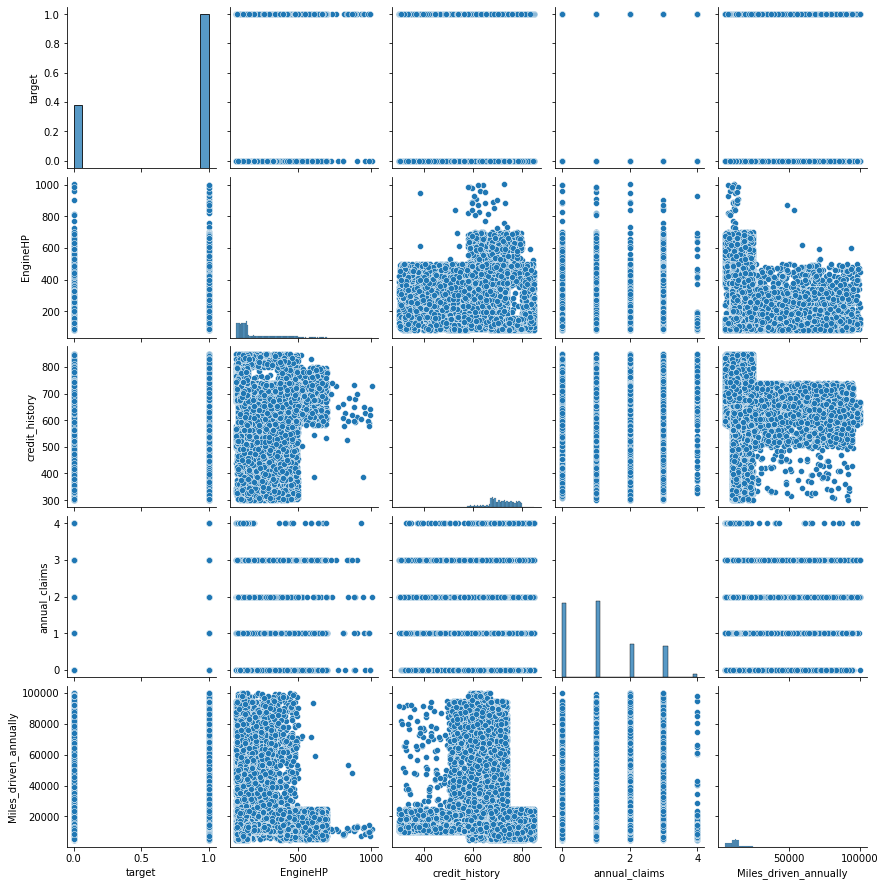

In [ ]:
sns.pairplot(data[['target','Gender','EngineHP','credit_history','annual_claims','Vehical_type','Miles_driven_annually']])

# Feature Engineering 

1) creating 'Children column' from marital status

In [ ]:
data['children'] = data[data['Marital_Status'] == 'Married']['size_of_family'] - 2 
data['children'] = data['children'].fillna(0)
data['children'] = data['children'].replace({-1: 1})
# creating children column from maritial status

2) creaing vechile column

In [ ]:
vechile = []
for i in data['Miles_driven_annually']:
  if i <= 25000:
    vechile.append('new')
  elif i > 25000 and i < 75000:
    vechile.append('middle')
  elif i >= 75000:
    vechile.append('old')
data['vechiles'] = pd.DataFrame(vechile, columns=['vechile'])
# creating vechile column with Miles driven annually

3) creating column experiance based on years experiance

In [ ]:
driver_type = []
for i in data['Years_Experience']:
  if i <= 10:
    driver_type.append('young')
  elif i >= 10 and i <=30:
    driver_type.append('man')
  elif i >= 30:
    driver_type.append('old man')
data['driver_type'] = pd.DataFrame(driver_type, columns=['experience'])
# creating years experiance column

# visualizing data

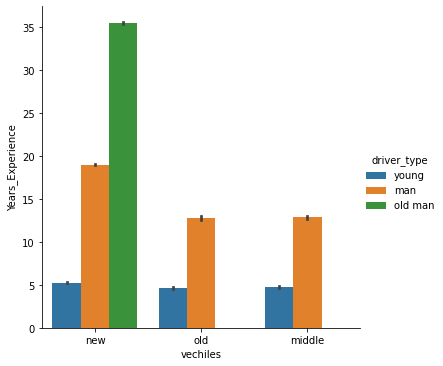

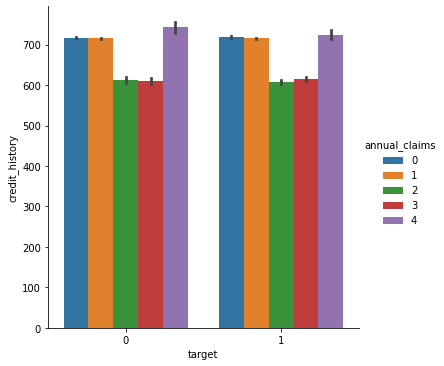

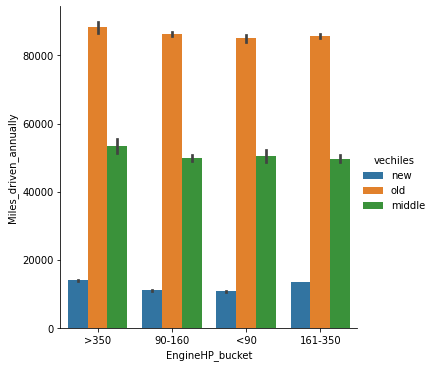

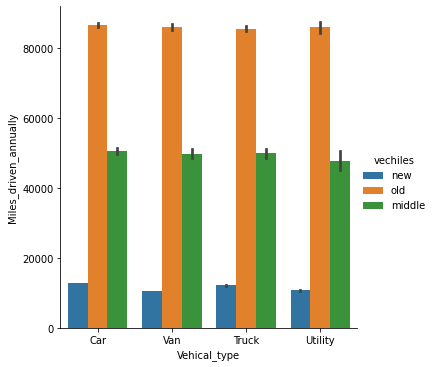

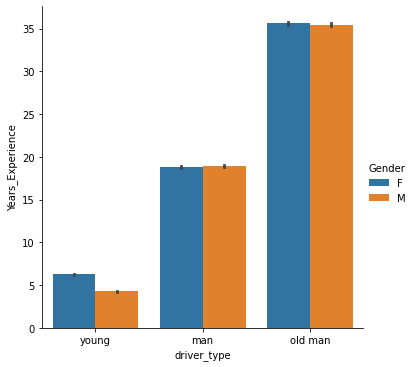

In [ ]:
sns.catplot(x="vechiles", y = 'Years_Experience' , hue= 'driver_type', kind="bar", data=data)
sns.catplot(x="target", y = 'credit_history' , hue= 'annual_claims', kind="bar", data=data)
sns.catplot(x="EngineHP_bucket", y = 'Miles_driven_annually' , hue= 'vechiles', kind="bar", data=data)
sns.catplot(x="Vehical_type", y = 'Miles_driven_annually' , hue= 'vechiles', kind="bar", data=data)
sns.catplot(x="driver_type", y = 'Years_Experience' , hue= 'Gender', kind="bar", data=data)

plt.show()

#checking columns value counts

In [ ]:
for i in data.columns:
    print(i,'--> column')
    print(data[i].value_counts())
    print()
# checking value counts for all columns

target --> column
1    21396
0     8844
Name: target, dtype: int64

Gender --> column
M    16359
F    13881
Name: Gender, dtype: int64

EngineHP --> column
132    284
150    280
153    276
136    276
102    274
      ... 
885      1
726      1
631      1
695      1
871      1
Name: EngineHP, Length: 648, dtype: int64

credit_history --> column
687    277
672    266
678    264
676    263
675    260
      ... 
557      4
364      4
332      4
457      3
492      2
Name: credit_history, Length: 551, dtype: int64

Years_Experience --> column
5     3012
6     1775
7     1712
8     1711
3     1473
2     1463
1     1431
4     1264
17     991
16     990
20     980
15     949
18     940
19     914
10     877
13     749
14     716
12     710
22     653
21     639
24     630
25     629
23     570
9      498
11     395
28     271
29     267
26     256
33     250
39     249
32     246
27     246
30     234
40     234
37     230
38     227
34     223
36     221
35     208
31     207
Name: Years_Expe

In [ ]:
data1 = data

converting objects into cat codes

In [ ]:
col = ['Gender','Marital_Status','Vehical_type','Age_bucket','EngineHP_bucket','Years_Experience_bucket','Miles_driven_annually_bucket','credit_history_bucket','State','vechiles','driver_type']

In [ ]:
for i in col:
    data[i] = data[i].astype('category')
    data[i] = data[i].cat.codes # converting object type of columns into cat codes

In [ ]:
for i in col:
    data[i] = data[i].astype('object')

# balancing data

In [ ]:
data['target'].value_counts()

1    21396
0     8844
Name: target, dtype: int64

In [ ]:
x = data.drop(['target'], axis = 1)
y = pd.DataFrame(data['target'])

In [ ]:
from imblearn.over_sampling import RandomOverSampler # balancing data
x_samp,y_samp = RandomOverSampler().fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_samp,y_samp, random_state=10, test_size=0.3)           # splitting data into 7 : 3 ratio                                 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train,y_train)
y_predict = model.predict(x_test)           #  predicting x_test
y_predict_train = model.predict(x_train)    #  predicting x_train

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_predict_train))
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.36      0.42     14952
           1       0.50      0.65      0.57     15002

    accuracy                           0.50     29954
   macro avg       0.50      0.50      0.49     29954
weighted avg       0.50      0.50      0.49     29954

              precision    recall  f1-score   support

           0       0.51      0.37      0.43      6444
           1       0.50      0.65      0.57      6394

    accuracy                           0.50     12838
   macro avg       0.51      0.51      0.50     12838
weighted avg       0.51      0.50      0.50     12838



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,auc
print(accuracy_score(y_test,y_predict))
print(precision_score(y_test,y_predict))
print(recall_score(y_test,y_predict))
print(f1_score(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))
confusion_matrix(y_test,y_predict)

0.504985200186945
0.502373128879153
0.6456052549264936
0.5650537266443091
0.5055307466438799


array([[2355, 4089],
       [2266, 4128]])

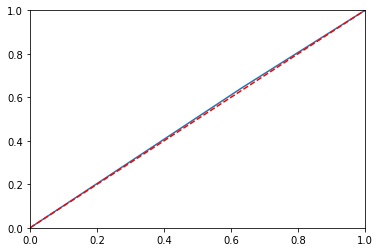

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,y_predict)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')


In [ ]:
print(fpr)
print(tpr)
print(threshold)

[0.         0.63454376 1.        ]
[0.         0.64560525 1.        ]
[2 1 0]


In [ ]:
Y_predict_prob = model.predict_proba(x_test)

In [ ]:
Y_predict_prob

array([[0.50030218, 0.49969782],
       [0.49097871, 0.50902129],
       [0.49215797, 0.50784203],
       ...,
       [0.50676554, 0.49323446],
       [0.50360409, 0.49639591],
       [0.50594362, 0.49405638]])

In [ ]:
k = tpr-fpr
val = np.argmax(k)
thresholds[val]

1

In [ ]:
fpr

array([0.        , 0.63656114, 1.        ])

In [ ]:
tpr

array([0.        , 0.64122615, 1.        ])

In [ ]:
thresholds

array([2, 1, 0])

#Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV           

In [ ]:
parameters = [{'min_samples_split' : [2,3],'max_depth' : [10,20,30,40]}]    
grid_model = GridSearchCV(estimator = GradientBoostingClassifier(),  param_grid = parameters, scoring=   'accuracy').fit(x_train,y_train)   # running grid search 
grid_model.best_params_                          # showing best parameters

{'max_depth': 20, 'min_samples_split': 3}

In [ ]:
gboost = GradientBoostingClassifier(loss='deviance',max_depth = 20,min_samples_split = 3).fit(x_train,y_train)
predict = gboost.predict(x_test)
predict2 = gboost.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))
print(classification_report(y_train,predict2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      6444
           1       0.83      0.83      0.83      6394

    accuracy                           0.83     12838
   macro avg       0.83      0.83      0.83     12838
weighted avg       0.83      0.83      0.83     12838

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14952
           1       1.00      1.00      1.00     15002

    accuracy                           1.00     29954
   macro avg       1.00      1.00      1.00     29954
weighted avg       1.00      1.00      1.00     29954



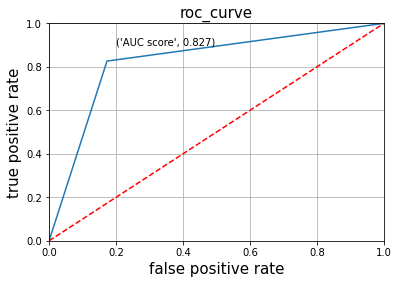

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,predict)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('roc_curve', fontsize = 15)
plt.xlabel('false positive rate', fontsize = 15)
plt.ylabel('true positive rate', fontsize = 15)
roc_score = roc_auc_score(y_test,predict)
plt.text(x = 0.2,y = 0.9 , s = ('AUC score',round(roc_score,3)))
plt.grid(True)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,auc
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(f1_score(y_test,predict))
print(roc_auc_score(y_test,predict))
confusion_matrix(y_test,predict)

0.826764293503661
0.82578125
0.8265561463872381
0.8261685164921058
0.8267634859807078


array([[5329, 1115],
       [1109, 5285]])

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameters = [{'n_estimators' : [75,100], 'max_depth' : [20,30,10]}]
grid = GridSearchCV(estimator = RandomForestClassifier(criterion = 'gini'),param_grid = parameters, scoring = 'accuracy').fit(x_train,y_train)        # usnig grid search 
grid.best_params_                   # showing best parameters  

{'max_depth': 30, 'n_estimators': 100}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randmodel = RandomForestClassifier(criterion = 'gini', max_depth = 30, n_estimators =  100).fit(x_train,y_train)
predict = randmodel.predict(x_test)
predict2 = randmodel.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))
print(classification_report(y_train,predict2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      6444
           1       0.83      0.83      0.83      6394

    accuracy                           0.83     12838
   macro avg       0.83      0.83      0.83     12838
weighted avg       0.83      0.83      0.83     12838

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14952
           1       1.00      1.00      1.00     15002

    accuracy                           1.00     29954
   macro avg       1.00      1.00      1.00     29954
weighted avg       1.00      1.00      1.00     29954



In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,auc
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(f1_score(y_test,predict))
print(roc_auc_score(y_test,predict))
confusion_matrix(y_test,predict)

0.8312042374201589
0.8277252287176307
0.8348451673443854
0.8312699525033092
0.8312183626914355


array([[5333, 1111],
       [1056, 5338]])

Text(0.2, 0.9, '0.8312183626914355')

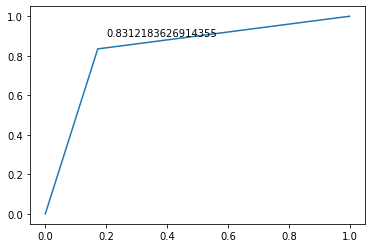

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,predict)
plt.plot(fpr,tpr)
plt.text(x = 0.2, y = 0.9, s = (roc_auc_score(y_test,predict)))

#SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier( ).fit(x_train,y_train)
predict = sgd.predict(x_test)                   # predicting x_test
predict2 = sgd.predict(x_train)                 # predicting x_train 
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))         
print(classification_report(y_train,predict2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6444
           1       0.50      1.00      0.66      6394

    accuracy                           0.50     12838
   macro avg       0.25      0.50      0.33     12838
weighted avg       0.25      0.50      0.33     12838

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14952
           1       0.50      1.00      0.67     15002

    accuracy                           0.50     29954
   macro avg       0.25      0.50      0.33     29954
weighted avg       0.25      0.50      0.33     29954



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,auc
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(f1_score(y_test,predict))
print(roc_auc_score(y_test,predict))
print(confusion_matrix(y_test,predict))

0.4980526561769746
0.4980526561769746
1.0
0.6649334442595675
0.5
[[   0 6444]
 [   0 6394]]


# adabost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
parameters = [{'n_estimators':[50,70,100],'learning_rate': [0.01,0.09,0.1],'algorithm' : ['SAMME', 'SAMME.R']}]
ada_grid = GridSearchCV(AdaBoostClassifier(),param_grid = parameters, scoring = 'accuracy').fit(x_train,y_train)
ada_grid.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 50}

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier( algorithm = 'SAMME.R',learning_rate =  0.1, n_estimators =  50).fit(x_train,y_train)
predict = adaboost.predict(x_test)            # predicting x_test
predict2 = adaboost.predict(x_train)          # predicting x_train 
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))
print(classification_report(y_train,predict2))

              precision    recall  f1-score   support

           0       0.51      0.42      0.46      6444
           1       0.51      0.60      0.55      6394

    accuracy                           0.51     12838
   macro avg       0.51      0.51      0.51     12838
weighted avg       0.51      0.51      0.51     12838

              precision    recall  f1-score   support

           0       0.52      0.42      0.47     14952
           1       0.51      0.61      0.56     15002

    accuracy                           0.52     29954
   macro avg       0.52      0.52      0.51     29954
weighted avg       0.52      0.52      0.51     29954



In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,auc
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(f1_score(y_test,predict))
print(roc_auc_score(y_test,predict))
confusion_matrix(y_test,predict)

0.5094251441034429
0.506294256490952
0.603847356897091
0.5507845934379458
0.5097914624336479


array([[2679, 3765],
       [2533, 3861]])

# k-nn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
parameters = [{'n_neighbors': [3,5,7,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size' : [25,30], 'metric' : ['euclidean','minkowski']}]
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = parameters, scoring = 'accuracy').fit(x_train,y_train)
grid_knn.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 25,
 'metric': 'euclidean',
 'n_neighbors': 3}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(algorithm =  'ball_tree',leaf_size =  25,metric =  'euclidean',n_neighbors =  3).fit(x_train,y_train)
predict = knn_model.predict(x_test)           # predicting x_test
predict2 = knn_model.predict(x_train)         # predicting x_train
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))
print(classification_report(y_train,predict2))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67      6444
           1       0.66      0.55      0.60      6394

    accuracy                           0.64     12838
   macro avg       0.64      0.64      0.64     12838
weighted avg       0.64      0.64      0.64     12838

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     14952
           1       0.89      0.75      0.82     15002

    accuracy                           0.83     29954
   macro avg       0.84      0.83      0.83     29954
weighted avg       0.84      0.83      0.83     29954



In [ ]:
from sklearn.model_selection import cross_val_score
error = []
for i in range(1,10,2):
  knn_model = KNeighborsClassifier(algorithm =  'ball_tree',leaf_size =  25,metric =  'euclidean',n_neighbors =  i)
  score = cross_val_score(knn_model, x_train,y_train,cv = 9)
  score = score.mean()
  error.append(1 - score)

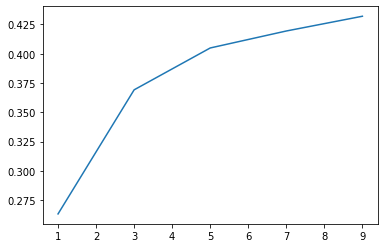

In [ ]:
plt.plot(range(1,10,2), error)


In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,auc
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(f1_score(y_test,predict))
print(roc_auc_score(y_test,predict))
confusion_matrix(y_test,predict)

0.6372487926468298
0.6634054562558795
0.5514544885830466
0.6022717567682979
0.6369159469606729


array([[4655, 1789],
       [2868, 3526]])

# PCA

In [ ]:
from sklearn.decomposition import PCA
x_train_pca = PCA( n_components= 15).fit_transform(x_train)
x_test_pca = PCA( n_components= 15).fit_transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_pca = RandomForestClassifier(criterion = 'gini', max_depth = 30, n_estimators =  100).fit(x_train_pca, y_train)
predict = rfc_pca.predict(x_test_pca)             
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62      6444
           1       0.64      0.88      0.74      6394

    accuracy                           0.69     12838
   macro avg       0.72      0.69      0.68     12838
weighted avg       0.72      0.69      0.68     12838



In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,auc
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(f1_score(y_test,predict))
print(roc_auc_score(y_test,predict))
confusion_matrix(y_test,predict)

0.6886586695747001
0.6361777070787411
0.8756646856427901
0.736952945047713
0.6893841739821649


array([[3242, 3202],
       [ 795, 5599]])

#cat boost

In [ ]:
pip install catboost

     |████████████████████████████████| 69.2MB 41kB/s 


In [ ]:
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier(iterations=10000, depth=5,learning_rate=0.03,random_seed=42).fit(x_train,y_train )
predict = model_cb.predict(x_test)   # predicting x_test

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Streaming output truncated to the last 5000 lines.
5000:	learn: 0.5201515	total: 1m 8s	remaining: 1m 8s
5001:	learn: 0.5201376	total: 1m 8s	remaining: 1m 8s
5002:	learn: 0.5201234	total: 1m 8s	remaining: 1m 8s
5003:	learn: 0.5200925	total: 1m 8s	remaining: 1m 8s
5004:	learn: 0.5200761	total: 1m 8s	remaining: 1m 8s
5005:	learn: 0.5200563	total: 1m 8s	remaining: 1m 8s
5006:	learn: 0.5200383	total: 1m 8s	remaining: 1m 8s
5007:	learn: 0.5200053	total: 1m 8s	remaining: 1m 8s
5008:	learn: 0.5199905	total: 1m 8s	remaining: 1m 8s
5009:	learn: 0.5199721	total: 1m 8s	remaining: 1m 8s
5010:	learn: 0.5199469	total: 1m 8s	remaining: 1m 8s
5011:	learn: 0.5199112	total: 1m 8s	remaining: 1m 8s
5012:	learn: 0.5198924	total: 1m 8s	remaining: 1m 8s
5013:	learn: 0.5198632	total: 1m 8s	remaining: 1m 8s
5014:	learn: 0.5198505	total: 1m 8s	remaining: 1m 8s
5015:	learn: 0.5198303	total: 1m 8s	remaining: 1m 8s
5016:	learn: 0.5197981	total: 1m 8s	remaining: 1m 8s
5017:	learn: 0.5197820	total: 1m 8s	remaining: 1

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,auc
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(f1_score(y_test,predict))
print(roc_auc_score(y_test,predict))
confusion_matrix(y_test,predict)

0.6859323882224646
0.6948201913559882
0.658742571160463
0.6763005780346821
0.6858269032090335


array([[4594, 1850],
       [2182, 4212]])

# ensamble - bagging with k-nn 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggmodel = BaggingClassifier(base_estimator= RandomForestClassifier(criterion = 'gini', max_depth = 30, n_estimators =  100), n_estimators = 10 ).fit(x_train,y_train)

In [ ]:
predict = baggmodel.predict(x_test)         # PREDICTING X_TEST
predict2 = baggmodel.predict(x_train)       # PREDICTING X_TRAIN
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))
print(classification_report(y_train,predict2))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6444
           1       0.81      0.81      0.81      6394

    accuracy                           0.81     12838
   macro avg       0.81      0.81      0.81     12838
weighted avg       0.81      0.81      0.81     12838

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14952
           1       1.00      1.00      1.00     15002

    accuracy                           1.00     29954
   macro avg       1.00      1.00      1.00     29954
weighted avg       1.00      1.00      1.00     29954



In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,auc
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(f1_score(y_test,predict))
print(roc_auc_score(y_test,predict))
confusion_matrix(y_test,predict)

0.806434023991276
0.8054383497421472
0.8060681889271192
0.8057531462518565
0.8064326047056453


array([[5199, 1245],
       [1240, 5154]])

#svm

In [ ]:
from sklearn.svm import SVC
svc_model = SVC().fit(x_train,y_train)
predict = svc_model.predict(x_test)         # PREDICTING X_TEST
predict2 = svc_model.predict(x_train)       # PREDICTING X_TRAIN
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))
print(classification_report(y_train,predict2))

              precision    recall  f1-score   support

           0       0.49      0.05      0.10      6444
           1       0.50      0.94      0.65      6394

    accuracy                           0.50     12838
   macro avg       0.49      0.50      0.37     12838
weighted avg       0.49      0.50      0.37     12838

              precision    recall  f1-score   support

           0       0.52      0.06      0.10     14952
           1       0.50      0.95      0.66     15002

    accuracy                           0.50     29954
   macro avg       0.51      0.50      0.38     29954
weighted avg       0.51      0.50      0.38     29954



In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,auc
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(f1_score(y_test,predict))
print(roc_auc_score(y_test,predict))
confusion_matrix(y_test,predict)

0.49657267487147533
0.4971560464924573
0.9432280262746324
0.6511201079622131
0.4983055091025552


array([[ 344, 6100],
       [ 363, 6031]])

#xgb boost classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(x_train,y_train)
predict = xgb.predict(x_test)         # PREDICTING X_TEST
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.55      0.54      0.54      6601
           1       0.52      0.53      0.53      6237

    accuracy                           0.53     12838
   macro avg       0.53      0.53      0.53     12838
weighted avg       0.53      0.53      0.53     12838



In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,auc
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))
print(f1_score(y_test,predict))
print(roc_auc_score(y_test,predict))
confusion_matrix(y_test,predict)

0.5341174637794049
0.5331088664421998
0.52001876759462
0.5264824637795898
0.5340627667892405


array([[3532, 2912],
       [3069, 3325]])

#Evaluation

logistic

In [ ]:
y_predict = model.predict(x_test)
accuracy_log = accuracy_score(y_test,y_predict)
prescion_log = precision_score(y_test,y_predict)
recall_log = recall_score(y_test,y_predict)
f1_score_log = f1_score(y_test,y_predict)
roc_auc_log = roc_auc_score(y_test,y_predict)

In [ ]:
models = pd.DataFrame({'model' : ['logistic'], 'accuracy' : [accuracy_log], 'prescion' : [prescion_log], 'recall' : [recall_log], 'f1_score' : [f1_score_log], 'roc_auc' : [roc_auc_log]})

gradient boosting

In [ ]:
predict = gboost.predict(x_test)
accuracy_gradient = accuracy_score(y_test,predict)
prescion_gradient = precision_score(y_test,predict)
recall_gradient = recall_score(y_test,predict)
f1_score_gradient = f1_score(y_test,predict)
roc_auc_gradient = roc_auc_score(y_test,predict)


In [ ]:
model_2 = pd.DataFrame({'model' : ['gradient boosting'], 'accuracy' : [accuracy_gradient], 'prescion' : [prescion_gradient], 'recall' : [recall_gradient], 'f1_score' : [f1_score_gradient], 'roc_auc' : [roc_auc_gradient]})

In [ ]:
models = models.append(model_2)

random forest

In [ ]:
predict = randmodel.predict(x_test)
accuracy_random = accuracy_score(y_test,predict)
prescion_random = precision_score(y_test,predict)
recall_random = recall_score(y_test,predict)
f1_score_random = f1_score(y_test,predict)
roc_auc_random = roc_auc_score(y_test,predict)

In [ ]:
model_3 = pd.DataFrame({'model' : ['random forest'], 'accuracy' : [accuracy_random], 'prescion' : [prescion_random], 'recall' : [recall_random], 'f1_score' : [f1_score_random], 'roc_auc' : [roc_auc_random]})
models = models.append(model_3)

SGD

In [ ]:
predict = sgd.predict(x_test)
accuracy_SGD = accuracy_score(y_test,predict)
prescion_SGD = precision_score(y_test,predict)
recall_SGD = recall_score(y_test,predict)
f1_score_SGD = f1_score(y_test,predict)
roc_auc_SGD = roc_auc_score(y_test,predict)

In [ ]:
model_4 = pd.DataFrame({'model' : ['SGD'], 'accuracy' : [accuracy_SGD], 'prescion' : [prescion_SGD], 'recall' : [recall_SGD], 'f1_score' : [f1_score_SGD], 'roc_auc' : [roc_auc_SGD]})
models = models.append(model_4)

ADABOOST

In [ ]:
predict = adaboost.predict(x_test)
accuracy_ADA = accuracy_score(y_test,predict)
prescion_ADA = precision_score(y_test,predict)
recall_ADA = recall_score(y_test,predict)
f1_score_ADA = f1_score(y_test,predict)
roc_auc_ADA = roc_auc_score(y_test,predict)


In [ ]:
model_5 = pd.DataFrame({'model' : ['ADABOOST'], 'accuracy' : [accuracy_ADA], 'prescion' : [prescion_ADA], 'recall' : [recall_ADA], 'f1_score' : [f1_score_ADA], 'roc_auc' : [roc_auc_ADA]})
models = models.append(model_5)

k-nn

In [ ]:
predict = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test,predict)
prescion_knn = precision_score(y_test,predict)
recall_knn = recall_score(y_test,predict)
f1_score_knn = f1_score(y_test,predict)
roc_auc_knn = roc_auc_score(y_test,predict)

In [ ]:
model_6 = pd.DataFrame({'model' : ['K-NN'], 'accuracy' : [accuracy_knn], 'prescion' : [prescion_knn], 'recall' : [recall_knn], 'f1_score' : [f1_score_knn], 'roc_auc' : [roc_auc_knn]})
models = models.append(model_6)

PCA

In [ ]:
predict = rfc_pca.predict(x_test_pca)
accuracy_PCA = accuracy_score(y_test,predict)
prescion_PCA = precision_score(y_test,predict)
recall_PCA = recall_score(y_test,predict)
f1_score_PCA = f1_score(y_test,predict)
roc_auc_PCA = roc_auc_score(y_test,predict)

In [ ]:
model_7 = pd.DataFrame({'model' : ['PCA'], 'accuracy' : [accuracy_PCA], 'prescion' : [prescion_PCA], 'recall' : [recall_PCA], 'f1_score' : [f1_score_PCA], 'roc_auc' : [roc_auc_PCA]})
models = models.append(model_7)

CAT BOOST

In [ ]:
predict = model_cb.predict(x_test)
accuracy_CAT = accuracy_score(y_test,predict)
prescion_CAT = precision_score(y_test,predict)
recall_CAT = recall_score(y_test,predict)
f1_score_CAT = f1_score(y_test,predict)
roc_auc_CAT = roc_auc_score(y_test,predict)

In [ ]:
model_8 = pd.DataFrame({'model' : ['CAT BOOST'], 'accuracy' : [accuracy_CAT], 'prescion' : [prescion_CAT], 'recall' : [recall_CAT], 'f1_score' : [f1_score_CAT], 'roc_auc' : [roc_auc_CAT]})
models = models.append(model_8)

ENSAMBLE

In [ ]:
predict = baggmodel.predict(x_test)
accuracy_ENS = accuracy_score(y_test,predict)
prescion_ENS = precision_score(y_test,predict)
recall_ENS = recall_score(y_test,predict)
f1_score_ENS = f1_score(y_test,predict)
roc_auc_ENS = roc_auc_score(y_test,predict)

In [ ]:
model_9 = pd.DataFrame({'model' : ['ENSAMBLE'], 'accuracy' : [accuracy_ENS], 'prescion' : [prescion_ENS], 'recall' : [recall_ENS], 'f1_score' : [f1_score_ENS], 'roc_auc' : [roc_auc_ENS]})
models = models.append(model_9)

SVM

In [ ]:
predict = svc_model.predict(x_test)
accuracy_SVM = accuracy_score(y_test,predict)
prescion_SVM = precision_score(y_test,predict)
recall_SVM = recall_score(y_test,predict)
f1_score_SVM = f1_score(y_test,predict)
roc_auc_SVM = roc_auc_score(y_test,predict)

In [ ]:
model_10 = pd.DataFrame({'model' : ['SVM'], 'accuracy' : [accuracy_SVM], 'prescion' : [prescion_SVM], 'recall' : [recall_SVM], 'f1_score' : [f1_score_SVM], 'roc_auc' : [roc_auc_SVM]})
models = models.append(model_10)

XGB

In [ ]:
predict = xgb.predict(x_test)
accuracy_XGB = accuracy_score(y_test,predict)
prescion_XGB = precision_score(y_test,predict)
recall_XGB = recall_score(y_test,predict)
f1_score_XGB = f1_score(y_test,predict)
roc_auc_XGB = roc_auc_score(y_test,predict)

In [ ]:
model_11 = pd.DataFrame({'model' : ['XGBOOST'], 'accuracy' : [accuracy_XGB], 'prescion' : [prescion_XGB], 'recall' : [recall_XGB], 'f1_score' : [f1_score_XGB], 'roc_auc' : [roc_auc_XGB]})
models = models.append(model_11)

In [ ]:
models

,model,accuracy,prescion,recall,f1_score,roc_auc
0,logistic,0.500545,0.498813,0.591336,0.541148,0.500897
0,gradient boosting,0.816872,0.810570,0.825149,0.817794,0.816904
0,random forest,0.822013,0.813234,0.834220,0.823593,0.822060
0,SGD,0.498053,0.498053,1.000000,0.664933,0.500000
0,ADABOOST,0.509425,0.506294,0.603847,0.550785,0.509791
0,K-NN,0.637249,0.663405,0.551454,0.602272,0.636916
0,PCA,0.688659,0.636178,0.875665,0.736953,0.689384
0,CAT BOOST,0.685932,0.694820,0.658743,0.676301,0.685827
0,ENSAMBLE,0.806434,0.805438,0.806068,0.805753,0.806433
0,SVM,0.496573,0.497156,0.943228,0.651120,0.498306


# visualizing classification  report

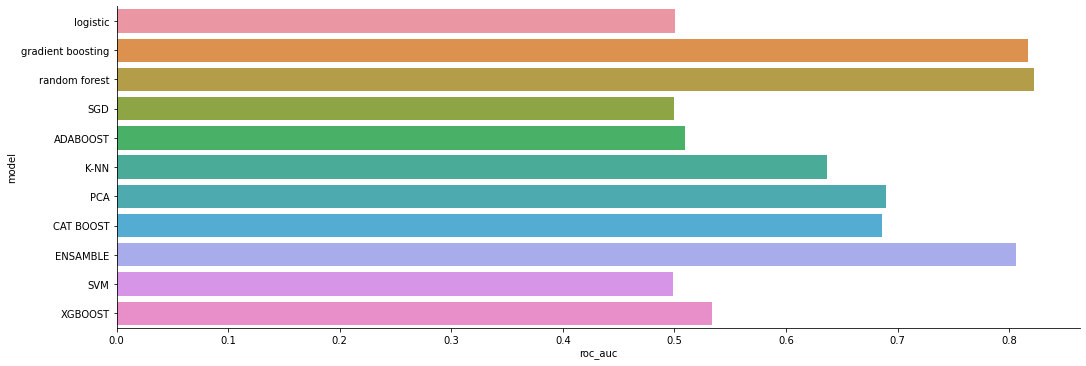

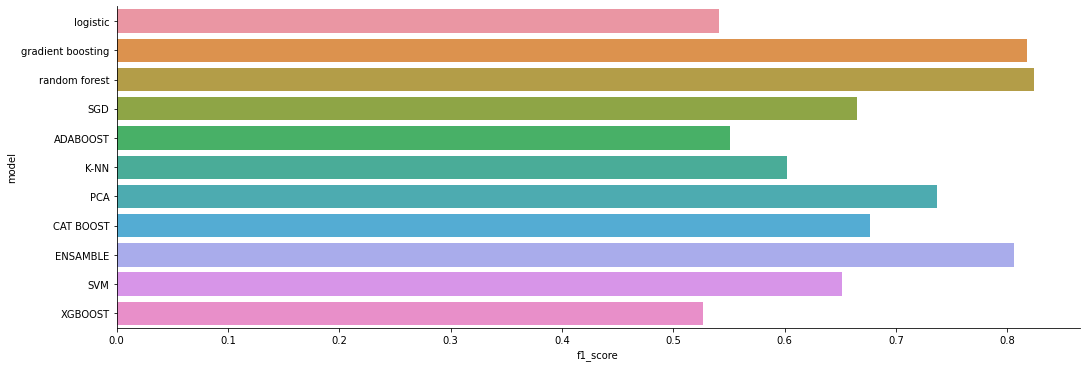

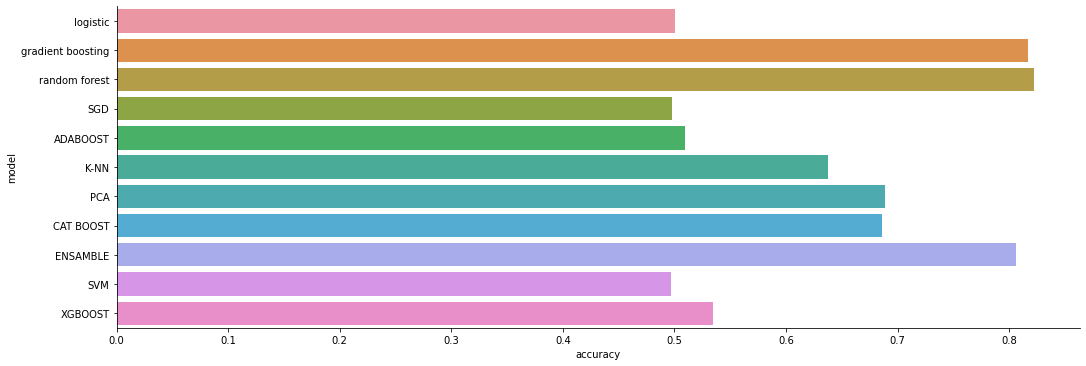

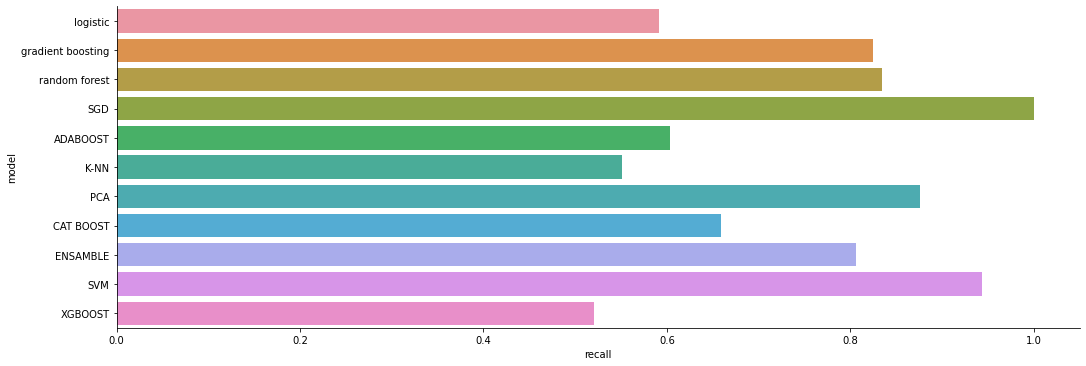

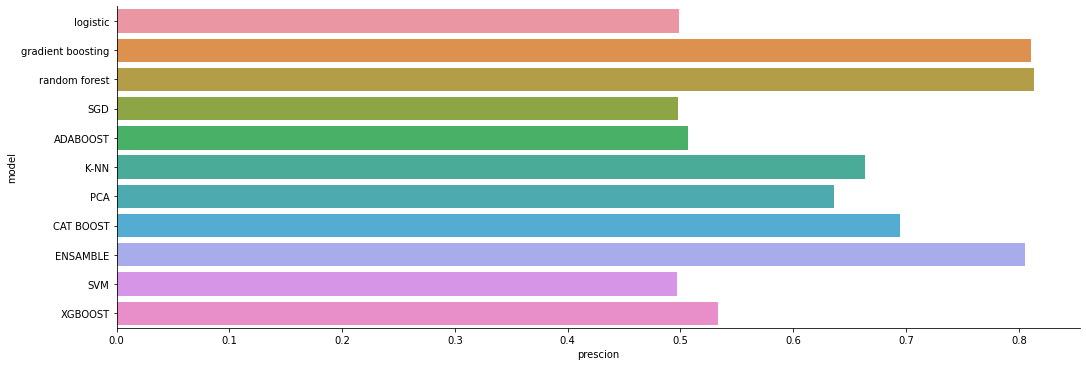

In [ ]:
sns.catplot(data=models, kind="bar", x = 'roc_auc',  y= "model" ,height=5,aspect=3)
sns.catplot(data=models, kind="bar", x = 'f1_score',  y= "model" ,height=5,aspect=3)
sns.catplot(data=models, kind="bar", x = 'accuracy',  y= "model" ,height=5,aspect=3)
sns.catplot(data=models, kind="bar", x = 'recall',  y= "model" ,height=5,aspect=3)
sns.catplot(data=models, kind="bar", x = 'prescion',  y= "model" ,height=5,aspect=3)

# FINAL RESULTS

 FROM MODEL EVALUATION RANDOM FOREST IS WORKING GOOD HAVING ACCURACY = 0.822 , PRESCION = 0.813, RECALL = 0.834, F1 - SCORE = 0.823, ROC_AUC = 0.822